In [1]:
pip install -U spacy

In [2]:
!python -m spacy download en_core_web_md

2023-09-19 10:47:07.830595: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-19 10:47:09.805519: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 12.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [3]:
!pip install wordcloud

In [4]:
pip install nltk

In [5]:
import numpy as np
import pandas as pd
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import seaborn as sns
from nltk.corpus import stopwords
from textblob import TextBlob

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
pip install -U textblob

In [9]:
nlp = spacy.load('en_core_web_md')

In [10]:
!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

2023-09-19 10:48:49.406090: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [11]:
from google.colab import files
uploaded = files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [25]:
data = pd.read_csv('Elon_musk.csv',error_bad_lines=False,encoding='Latin-1')
data

<ipython-input-25-1f57df0b589e>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('Elon_musk.csv',error_bad_lines=False,encoding='Latin-1')


,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [26]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [27]:
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [28]:
len(data)

1999

In [29]:
#Calculating Number of words in single tweet
data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
data[['Text','word_count']].head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [30]:
#Calculating number of character in single tweet
data['char_count'] = data['Text'].str.len()
data[['Text','char_count']].head()

,Text,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


In [31]:
#calculating average word length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word)for word in words)/len(words))
data['avg_word'] = data['Text'].apply(lambda x: avg_word(x))
data[['Text','avg_word']].head()

,Text,avg_word
0,@kunalb11 Im an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471


In [32]:
#Calculating number of stopwords
stop = stopwords.words('english')
data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Text','stopwords']].head()

,Text,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


In [33]:
#Calculating number of special charcters
data['hastags'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
data[['Text','hastags']].head()

,Text,hastags
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1


In [34]:
#calculating number of Numerics
data['numerics'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Text','numerics']].head()

,Text,numerics
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [35]:
#calculating number of upper case words
data['upper'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Text','upper']].head()

,Text,upper
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [36]:
#Finding lower case
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Text'].head()

0                               @kunalb11 im an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

In [37]:
#Removing punctations
data['Text'] = data['Text'].str.replace('[^\w\s]','')
data['Text'].head()

<ipython-input-37-ebdc49c0468b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text'] = data['Text'].str.replace('[^\w\s]','')


0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

In [38]:
uploaded = files.upload()

Saving Elon_musk.csv to Elon_musk (1).csv


In [40]:
Elon = pd.read_csv('Elon_musk.csv',error_bad_lines=False,encoding='Latin-1')
Elon

<ipython-input-40-66213c2c7538>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Elon = pd.read_csv('Elon_musk.csv',error_bad_lines=False,encoding='Latin-1')


,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [41]:
Elon.drop(['Unnamed: 0'],inplace=True,axis=1)

In [42]:
import re
def clean_tweets(tweets):
    tweets = re.sub('@[A-Za-z0-100_]+', '', tweets) #Removing tag(@)
    tweets = re.sub('#', '', tweets) # Removing hashtag(#)
    tweets = re.sub('RT[\s]+', '', tweets) # Removing Retweets
    tweets = re.sub('https?:\/\/\S+', '', tweets) # Removing links
    tweets = re.sub('<[^<]+?>', '', tweets) #remove html tags
    tweets = re.sub('\n', '', tweets) # remove new lines
    tweets = re.sub('&', '', tweets) #remove &amp
    # tweets = re.sub('[^\w]', '', tweets) #remoce _
    return tweets

Elon['Text'] = Elon.Text.apply(clean_tweets)

In [43]:
Elon

,Text
0,Im an alien
1,Ray tracing on Cyberpunk with HDR is next-lev...
2,Great interview!
3,27 Doge is underestimated
4,Congratulations Tesla China for amazing execu...
...,...
1994,"True, it sounds so surreal, but the negative ..."
1995,Make sure to read ur terms amp; conditions be...
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is


In [44]:
Elon = [Text.strip() for Text in Elon.Text]
Elon = [Text for Text in Elon if Text]
Elon[0:5]

['I\x92m an alien',
 'Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 'Great interview!',
 '27 Doge is underestimated',
 'Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [45]:
text = ' '.join(Elon)
text

'I\x92m an alien Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? Great interview! 27 Doge is underestimated Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! Frodo was the underdoge,All thought he would fail,Himself most of all. Haha thanks :) Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler He definitely has issues, but the sentencing seems a bit high Thanks for fixing Please unlock my account This is true power haha Any crypto wallet that won\x92t give you your private keys should be avoided at all costs Your app sucks : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission! Yes 3   Once we can predict cash flow reasonably well, Starlink will

In [46]:
no_punc_text = text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I\x92m an alien Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it Great interview 27 Doge is underestimated Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox Frodo was the underdogeAll thought he would failHimself most of all Haha thanks  Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler He definitely has issues but the sentencing seems a bit high Thanks for fixing Please unlock my account This is true power haha Any crypto wallet that won\x92t give you your private keys should be avoided at all costs Your app sucks  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission Yes 3   Once we can predict cash flow reasonably well Starlink will IPO Starlink is a st

In [47]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [48]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['I\x92m', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', '27', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdogeAll', 'thought', 'he', 'would']


In [49]:
len(text_tokens)

17104

In [50]:
lower_words = [Text.lower() for Text in text_tokens]
print(lower_words[0:50])

['i\x92m', 'an', 'alien', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'great', 'interview', '27', 'doge', 'is', 'underestimated', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'frodo', 'was', 'the', 'underdogeall', 'thought', 'he', 'would']


In [51]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
my_stop_words = stopwords.words('english')
my_stop_words[0:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [53]:
my_stop_words.append('the')
no_stop_tokens = [word for word in lower_words if not word in my_stop_words]
print(no_stop_tokens[0:40])

['i\x92m', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'great', 'interview', '27', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdogeall', 'thought', 'would', 'failhimself', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation']


In [54]:
len(no_stop_tokens)

10918

In [55]:
len(lower_words)

17104

In [56]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [57]:
stemmed_tokens = [ps.stem(word) for word in no_stop_tokens]
print(stemmed_tokens[0:40])

['i\x92m', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'great', 'interview', '27', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdogeal', 'thought', 'would', 'failhimself', 'haha', 'thank', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc']


In [58]:
for w in no_stop_tokens:
  print(w, " : ", ps.stem(w))

Streaming output truncated to the last 5000 lines.
burdened  :  burden
cost  :  cost
depends  :  depend
flight  :  flight
rate  :  rate
prototypes  :  prototyp
piece  :  piec
cake  :  cake
high  :  high
volume  :  volum
production  :  product
new  :  new
technology  :  technolog
extremely  :  extrem
hard  :  hard
ta  :  ta
expect  :  expect
make  :  make
heavy  :  heavi
use  :  use
lfp  :  lfp
medium  :  medium
range  :  rang
cars  :  car
amp  :  amp
stationary  :  stationari
storage  :  storag
berlin  :  berlin
use  :  use
4680  :  4680
cell  :  cell
structural  :  structur
battery  :  batteri
pack  :  pack
amp  :  amp
front  :  front
amp  :  amp
rear  :  rear
single  :  singl
piece  :  piec
castings  :  cast
also  :  also
wish  :  wish
companies  :  compani
would  :  would
put  :  put
spreadsheets  :  spreadsheet
moment  :  moment
focus  :  focu
making  :  make
7  :  7
bar  :  bar
absolute  :  absolut
fine  :  fine
cryo  :  cryo
pressure  :  pressur
test  :  test
succeeded  :  succee

In [59]:
doc = nlp(' '.join(stemmed_tokens))
print(doc[0:40])

im alien ray trace cyberpunk hdr nextlevel tri great interview 27 doge underestim congratul tesla china amaz execut last year next even happi new year ox frodo underdogeal thought would failhimself haha thank inde tweet definit repres realworld time alloc


In [60]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer. fit_transform(stemmed_tokens)

In [61]:
print(vectorizer.vocabulary_)

{'alien': 260, 'ray': 2295, 'trace': 2935, 'cyberpunk': 809, 'hdr': 1382, 'nextlevel': 1947, 'tri': 2952, 'great': 1328, 'interview': 1554, '27': 70, 'doge': 926, 'underestim': 3006, 'congratul': 721, 'tesla': 2851, 'china': 633, 'amaz': 282, 'execut': 1083, 'last': 1635, 'year': 3214, 'next': 1946, 'even': 1061, 'happi': 1365, 'new': 1944, 'ox': 2053, 'frodo': 1231, 'underdogeal': 3005, 'thought': 2879, 'would': 3199, 'failhimself': 1118, 'haha': 1354, 'thank': 2859, 'inde': 1511, 'tweet': 2981, 'definit': 845, 'repres': 2351, 'realworld': 2308, 'time': 2895, 'alloc': 263, 'entertain': 1035, 'outcom': 2030, 'like': 1686, 'sent': 2499, 'agre': 244, 'clubhous': 663, 'it': 1573, 'get': 1284, 'real': 2303, 'bought': 511, 'dogecoin': 928, 'lil': 1687, 'toddler': 2907, 'hodler': 1428, 'issu': 1572, 'sentenc': 2500, 'seem': 2486, 'bit': 471, 'high': 1414, 'fix': 1176, 'pleas': 2144, 'unlock': 3028, 'account': 208, 'true': 2961, 'power': 2176, 'crypto': 793, 'wallet': 3106, 'won': 3187, 'give

In [62]:
print(vectorizer.get_feature_names_out())
print (X.toarray()[0:50])

['005' '10' '100' ... 'zon' 'zone' 'ðogecoin']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [63]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,4), max_features = 500)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(Elon)

In [64]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['10' '20' '247' '28delayslater' '3031925' '305' '3d' '3owners' '40' '45'
 '60' '74' '742' '85' 'about' 'absolutely' 'accurate' 'actually' 'after'
 'again' 'ago' 'ai' 'air' 'all' 'almost' 'already' 'also' 'although' 'am'
 'amazing' 'amp' 'an' 'and' 'any' 'appreciated' 'are' 'around' 'as'
 'astronauts' 'at' 'at tesla' 'autopilot' 'awesome' 'back' 'bad' 'bar'
 'battery' 'be' 'be great' 'because' 'been' 'before' 'being' 'berlin'
 'best' 'beta' 'better' 'between' 'big' 'bit' 'boca' 'body' 'booster'
 'both' 'build' 'but' 'but it' 'but we' 'by' 'can' 'can be' 'car' 'cargo'
 'cars' 'close' 'cold' 'come' 'coming' 'coming soon' 'companies'
 'completed' 'confirmed' 'congratulations' 'cool' 'cost' 'could' 'course'
 'course still' 'course still love' 'course still love you' 'cov2' 'crew'
 'crew dragon' 'data' 'day' 'days' 'definitely' 'design' 'did' 'didn'
 'different' 'do' 'does' 'doesn' 'doge' 'doing' 'dojo' 'don' 'done' 'down'
 'dragon' 'driving' 'droneship' 'early' 'earth' 'easy' 'electric' 'e

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
tfidf_vectorizer = TfidfVectorizer(norm="l2",analyzer='word',ngram_range=(1,3),max_features = 500)

In [67]:
tf_idf_matrix =tfidf_vectorizer.fit_transform(Elon)

In [68]:
print(tfidf_vectorizer.get_feature_names_out())
print(tf_idf_matrix.toarray())

['10' '20' '247' '28delayslater' '3031925' '305' '3d' '3owners' '45' '60'
 '74' '742' '85' 'about' 'absolutely' 'accurate' 'actually' 'after' 'ai'
 'air' 'all' 'almost' 'already' 'also' 'although' 'am' 'amazing' 'amp'
 'an' 'and' 'any' 'appreciated' 'are' 'around' 'as' 'astronauts' 'at'
 'at tesla' 'at the' 'autopilot' 'awesome' 'back' 'bad' 'bar' 'battery'
 'be' 'be great' 'because' 'been' 'before' 'being' 'berlin' 'best' 'beta'
 'better' 'between' 'big' 'bit' 'boca' 'body' 'booster' 'both' 'build'
 'but' 'but it' 'but we' 'by' 'call' 'called' 'can' 'can be' 'car' 'cargo'
 'cars' 'close' 'cold' 'come' 'coming' 'coming soon' 'companies'
 'completed' 'confirmed' 'congratulations' 'cool' 'cost' 'could' 'course'
 'course still' 'course still love' 'cov2' 'crew' 'crew dragon' 'data'
 'day' 'days' 'definitely' 'design' 'did' 'didn' 'different' 'do' 'does'
 'doesn' 'doge' 'doing' 'dojo' 'don' 'done' 'down' 'dragon' 'driving'
 'droneship' 'early' 'earth' 'easy' 'electric' 'energy' 'engine'
 '

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [71]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(40, 30))
  plt.imshow(wordcloud)
  plt.axis("off");

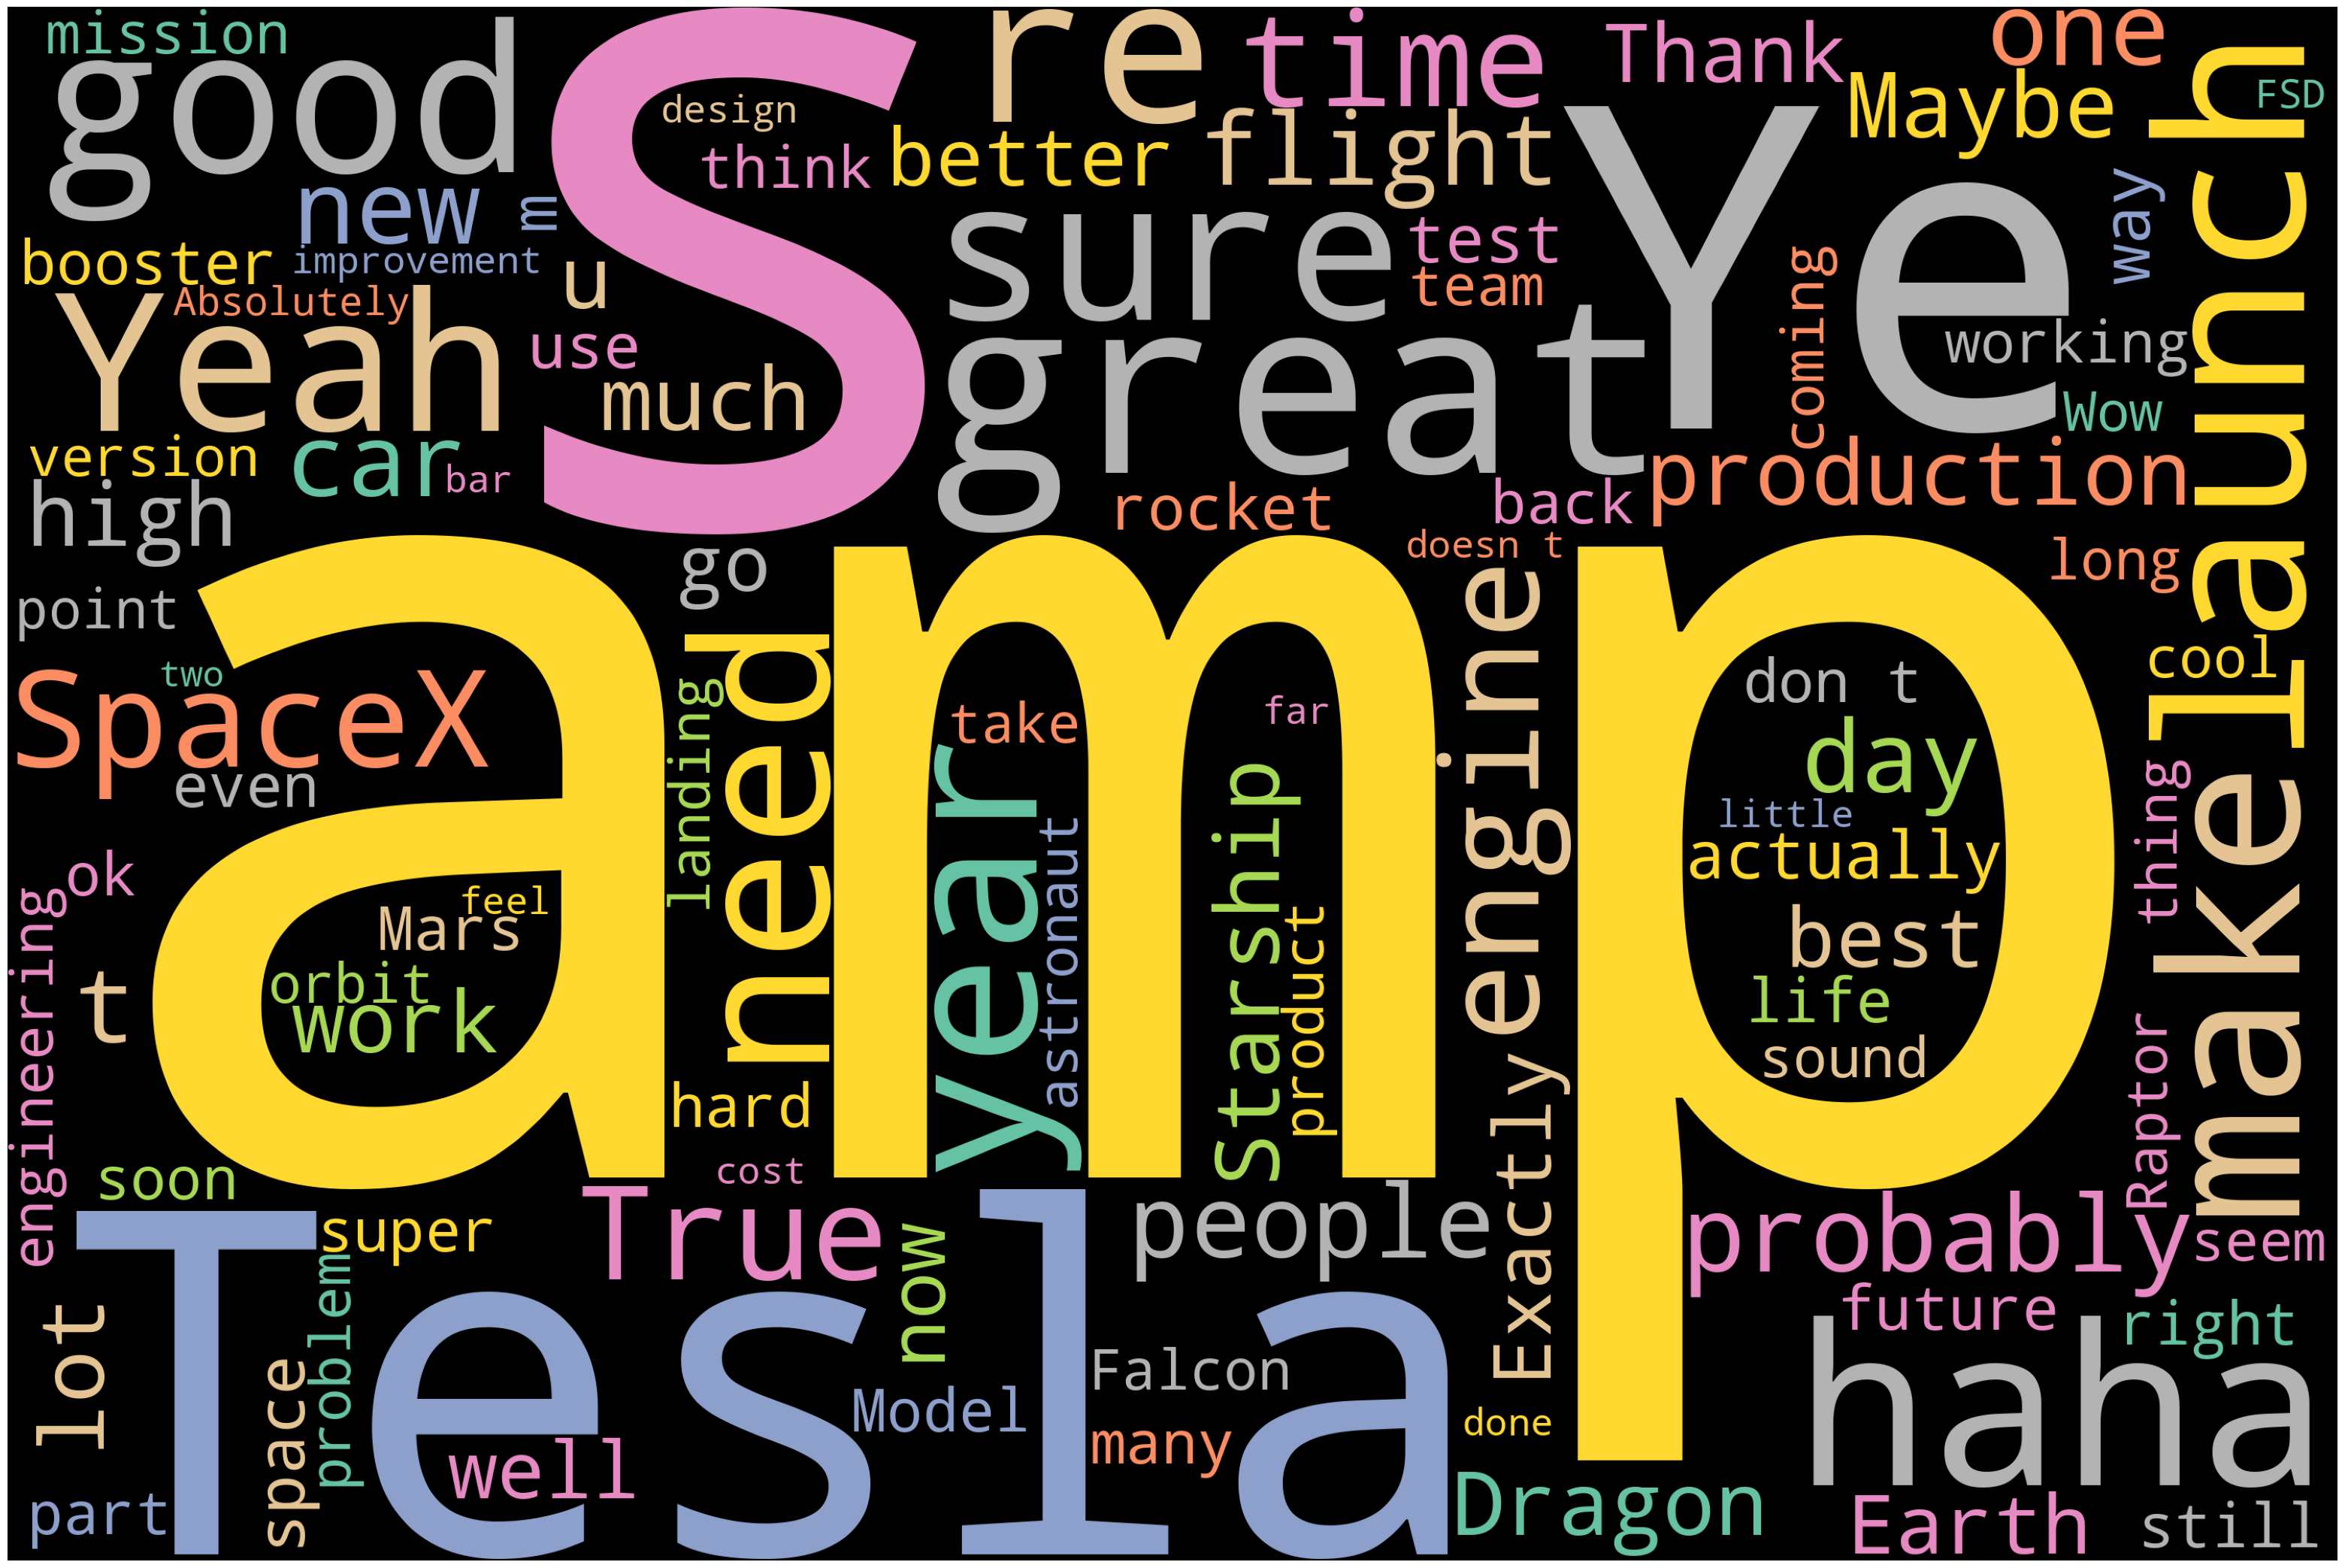

In [72]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
plot_cloud(wordcloud)

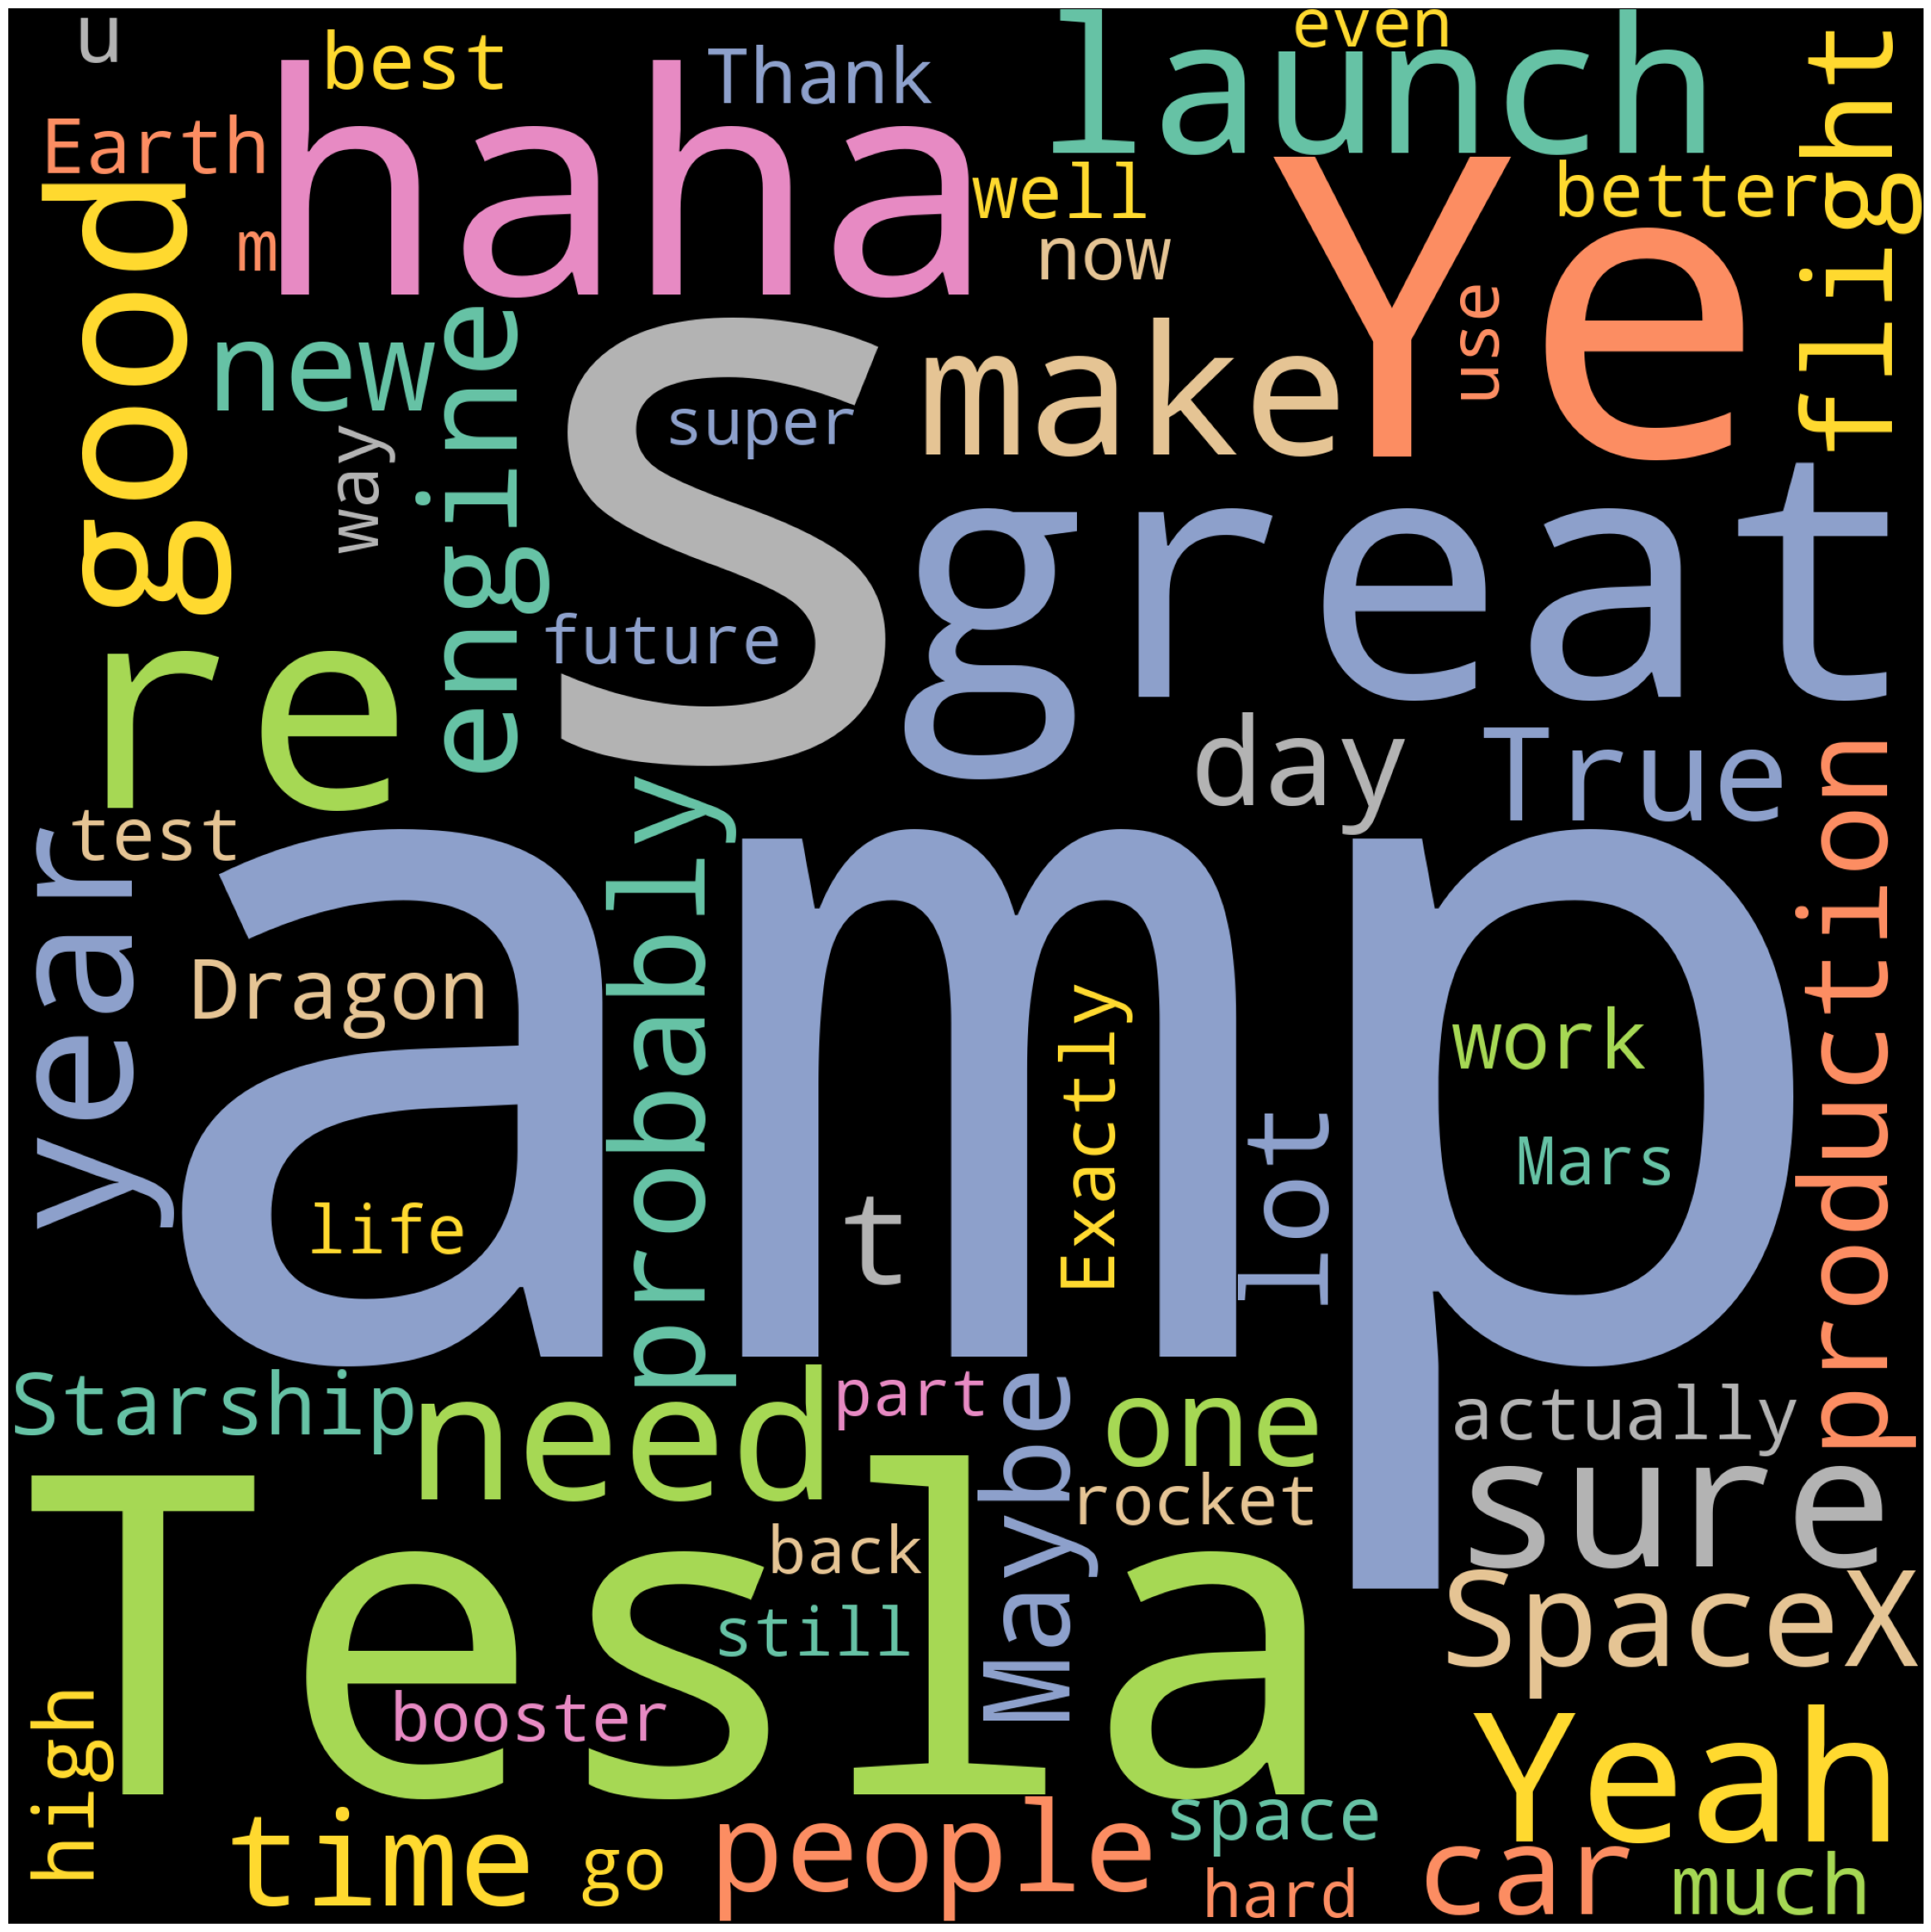

In [73]:
wordcloud = WordCloud(width = 2000, height = 2000, background_color='black', max_words=60,
                      colormap='Set2',stopwords=stopwords).generate(text)
plot_cloud(wordcloud)

**Positive words**

In [74]:
import codecs
import re
import copy
import collections
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
import matplotlib
%matplotlib inline

In [75]:
from google.colab import files
uploaded = files.upload()

Saving positive-words.txt to positive-words.txt


In [76]:
with codecs.open("positive-words.txt", "r", encoding="utf-8") as p:
  pos = p.read()
  print(pos)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

**Negative Words**

In [77]:
from google.colab import files
uploaded = files.upload()

Saving negative-words.txt to negative-words.txt


In [78]:
with codecs.open("negative-words.txt", "r",encoding="ISO-8859-1") as n:
  neg = n.read()
  print(neg)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

**Stop**

In [79]:
from google.colab import files
uploaded = files.upload()

Saving stop.txt to stop.txt


In [80]:
with codecs.open("stop.txt","r", encoding="ISO-8859-1") as s:
  stop=s.read()
  print(stop)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example